# Procesos Estocásticos: Hoja 2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from stochastic_processes import plot_time_simulations

## Ejercicio 1

![images/PE-HW2-1.jpg](images/PE-HW2-1.jpg)


## Ejercicio 2

![images/PE-HW2-2.jpg](images/PE-HW2-2.jpg)


b) Illustrate this property by simulating a Wiener process in $[0, 1]$ and making a plot of the sample estimate and the theoretical values of $γ(t, 0.25)$ as a function of $t ∈ [0, 1]$.


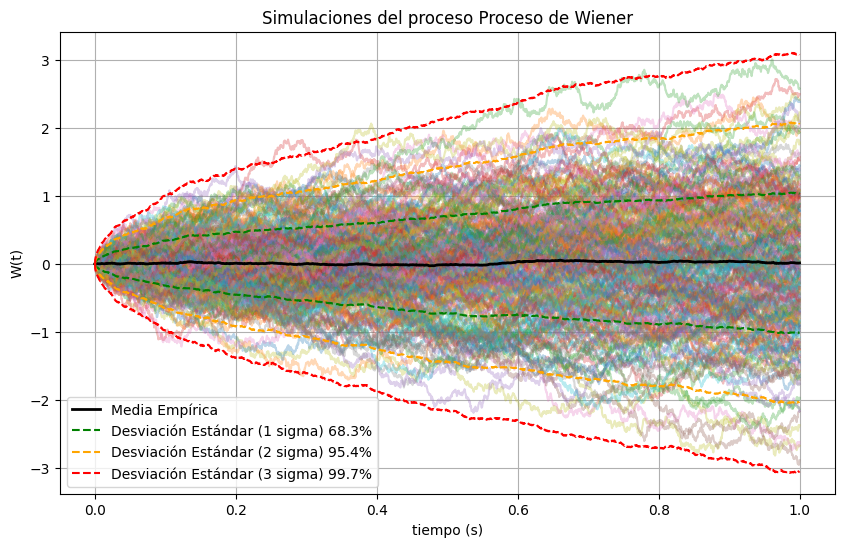

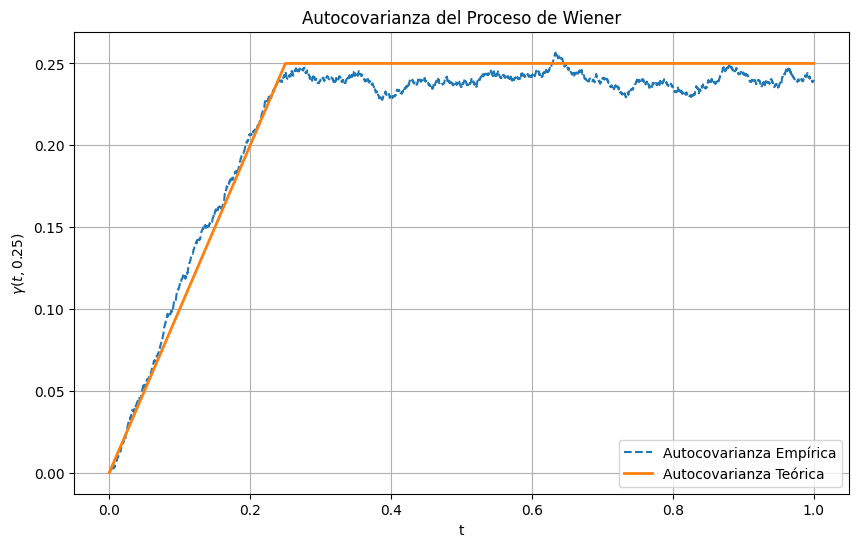

In [4]:
from stochastic_processes import simulate_wiener_process, estimate_autocovariance

# Parámetros
T = 1.0   # Intervalo [0, 1]
W0 = 0.0  # Valor inicial del Wiener
M = 250  # Número de simulaciones
N = 2500  # Número de pasos
fixed_s = 0.25  # Valor fijo para calcular γ(t, 0.25)
t_values = np.linspace(0, T, N + 1)

# Simulación
W = simulate_wiener_process(T, W0, M, N)

# Media y varianza
mean_empirical = np.mean(W, axis=0)
variance_empirical = np.var(W, axis=0)

# Estimación de la autocovarianza
gamma_empirical = estimate_autocovariance(W, t_values, fixed_s)
gamma_theoretical = np.minimum(t_values, fixed_s)

# Gráfica del proceso de Wiener
plot_time_simulations(W, t_values, "Proceso de Wiener")


# Gráfica de la autocovarianza
plt.figure(figsize=(10, 6))
plt.plot(t_values, gamma_empirical,
         label="Autocovarianza Empírica", linestyle="--")
plt.plot(t_values, gamma_theoretical,
         label="Autocovarianza Teórica", linewidth=2)
plt.xlabel("t")
plt.ylabel(r"$\gamma(t, 0.25)$")
plt.title("Autocovarianza del Proceso de Wiener")
plt.legend()
plt.grid()
plt.show()

## Ejercicio 3

![images/PE-HW2-3.jpg](images/PE-HW2-3.jpg)

Make a plot of the trajectories of the first three processes to illustrate that they are standard Brownian motion processes. Compare the histogram of the final values of the simulated trajectories with the theoretical density function.

ValueError: x and y must have same first dimension, but have shapes (2001,) and (1001,)

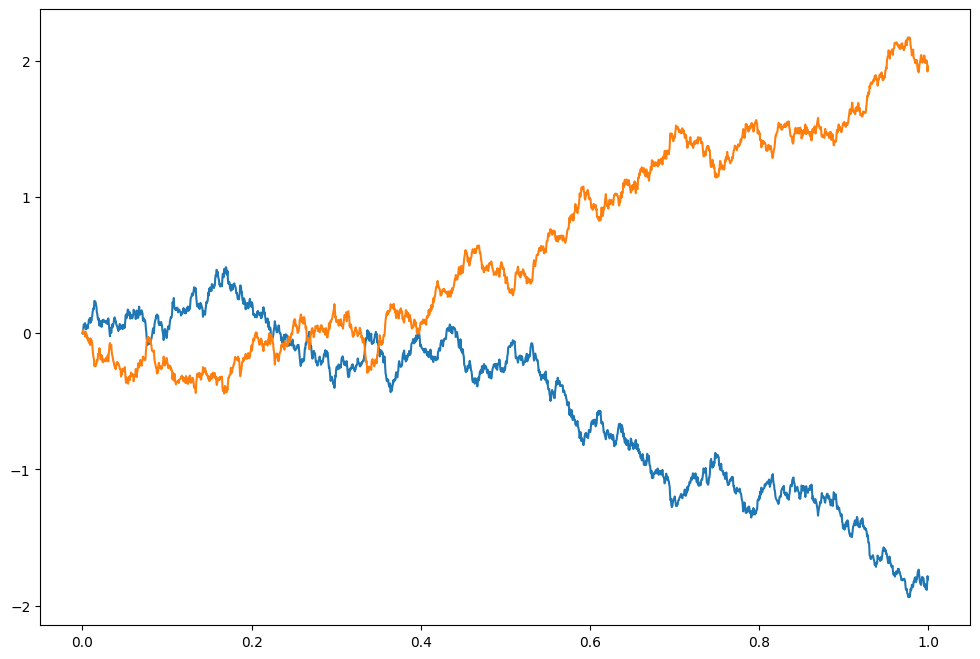

In [3]:
from stochastic_processes import simulate_modified_processes

# Parámetros
rho = 0.8
c = 2.0

# Simulación de procesos
Y1, Y2, Y3 = simulate_modified_processes(T, M, N, rho, c)

# Trayectorias de los procesos simulados
plt.figure(figsize=(12, 8))
plt.plot(t_values, Y1[0], label="Trayectoria Y1(t)")
plt.plot(t_values, Y2[0], label="Trayectoria Y2(t)")
plt.plot(t_values, Y3[0], label="Trayectoria Y3(t)")
plt.xlabel("t")
plt.ylabel("Valores")
plt.title("Trayectorias de Procesos Modificados")
plt.legend()
plt.grid()
plt.show()

# Histogramas de valores finales
final_values = [Y1[:, -1], Y2[:, -1], Y3[:, -1]]
labels = ["Y1(t=1)", "Y2(t=1)", "Y3(t=1)"]

plt.figure(figsize=(12, 8))
for i, values in enumerate(final_values):
    plt.hist(values, bins=30, density=True, alpha=0.6, label=labels[i])
plt.xlabel("Valor Final")
plt.ylabel("Densidad")
plt.title("Histogramas de Valores Finales")
plt.legend()
plt.grid()
plt.show()
